In [2]:
import numpy as np
from maneuvers import Maneuvers
from datetime import datetime
import constants, auxiliary,coordinates,models
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
%load_ext autoreload
%autoreload 2

In [3]:
# Initial Conditions
coe,startDate = auxiliary.parseTle("suchai0.tle")
coe[2] = 5*np.pi/180
# Spacecraft
wetMass = 3
propMass = 2
area = 10
satellite = models.Spacecraft(wetMass,wetMass-propMass,area)

# Thruster
thrust = 10e-3
isp = 720
satellite.thruster = models.Thruster(thrust=thrust,isp=isp)
#satellite.thruster = models.IFMNanoThruster()

# Solar Panels
satellite.solarPanels = models.DHV_CS_10(3)

# Orbiting Object
orbitingObject = models.Spacecraft(0.1,0.1,1)

# Maneuvers
maneuver = Maneuvers(coe,satellite,startDate,formulation="betts")
maneuver.addPerturbation("thrust")
maneuver.propagate(60*60*24*5,60)
maneuver.propagate(60*60*24*5,60)
#maneuver.removePerturbation("thrust")
#maneuver.propagate(60*60*24*10,60*10)

Propagating...from day  0.0  to  5.0
Propagating...from day  5.0  to  10.0


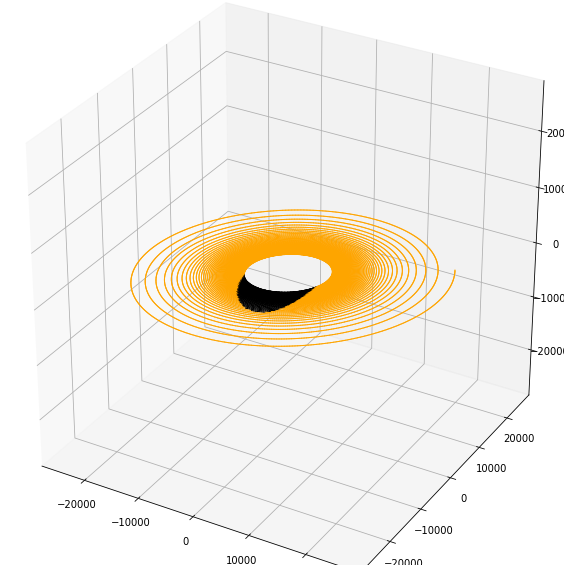

In [4]:
ax = maneuver.plot("3d-trajectory");
ax.clear()
maneuver.calculateEclipseHours()
colors = np.where(maneuver.history.eclipse,"orange","black")

for idx in range(0,maneuver.history.r.shape[0]):
    ax.plot3D(maneuver.history.r[idx:idx+2,0]/1000,
              maneuver.history.r[idx:idx+2,1]/1000,
              maneuver.history.r[idx:idx+2,2]/1000,linewidth=1,color=colors[idx][0])
auxiliary.set_axes_equal(ax)
ax.set_aspect("equal")

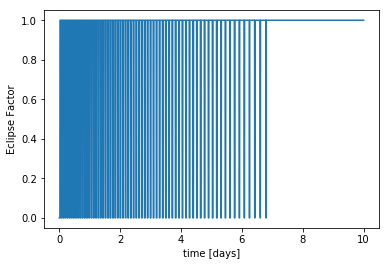

In [8]:
plt.plot(maneuver.history.t/60/60/24,maneuver.history.eclipse)
plt.ylabel("Eclipse Factor");
plt.xlabel("time [days]");

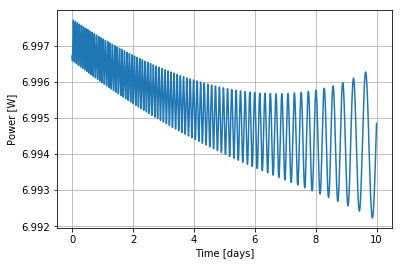

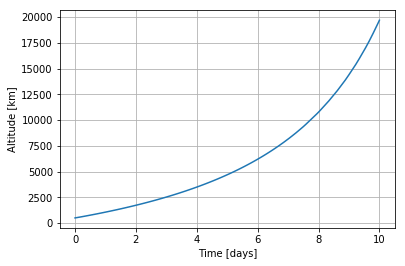

In [12]:
maneuver.calculatePower()
plt.plot(maneuver.history.t/60/60/24,maneuver.history.solarPanelsPower,label="solar")
#plt.plot(maneuver.history.t/60/60/24,maneuver.history.thrusterPower,label="thruster");
plt.ylabel("Power [W]")
plt.xlabel("Time [days]")
plt.grid()
plt.figure()
plt.plot(maneuver.history.t/60/60/24,np.linalg.norm(maneuver.history.r,axis=1)/1000-constants.Re/1000)
plt.ylabel("Altitude [km]")
plt.xlabel("Time [days]")
plt.grid()